# Persistence Images

This notebook demonstrates basic usage of the PerImage class.

In [1]:
%load_ext autoreload
%autoreload 2

## Generate a persistence diagram with Ripser 

In [2]:
from itertools import product

import numpy as np
from sklearn import datasets
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt

from ripser import Rips
from persim import PersImage

## Generate persistence diagram using Ripser

Rips(maxdim=1, thres=-1, coef=2, verbose=True)


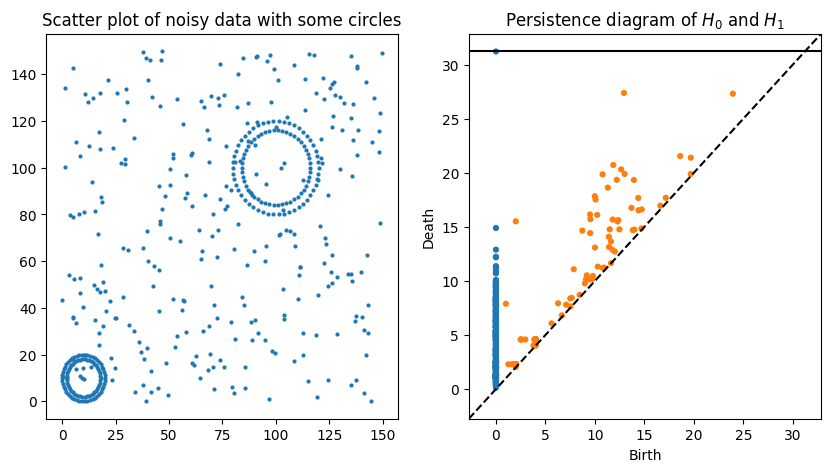

In [26]:
# lots of random noise and 2 circles
data = np.concatenate([150 * np.random.random((300,2)), 
                       10 + 10 * datasets.make_circles(n_samples=100)[0],
                       100 + 20 * datasets.make_circles(n_samples=100)[0]])

rips = Rips()
dgms = rips.fit_transform(data)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(data[:,0], data[:,1], s=4)
plt.title("Scatter plot of noisy data with some circles")

plt.subplot(122)
rips.plot(dgms, legend=False, show=False)
plt.title("Persistence diagram of $H_0$ and $H_1$")

## Convert diagram to persistence image 

PersImage(pixels=400, spread=1, specs=None, kernel_type="gaussian", weighting_type="linear")


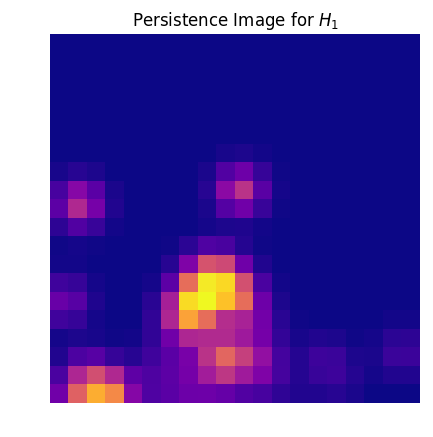

In [28]:
pim = PersImage(spread=1)
img = pim.transform(dgms[1])
plt.axis('off')
plt.title("Persistence Image for $H_1$")
pim.show(img)